In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
# additional libraries 
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# for better color representation 
plt.style.use('ggplot')
from inspect import signature
from sklearn import tree
from scipy import stats 
from scipy import signal
from sklearn import preprocessing
from scipy.fft import fft, fftfreq
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, validation_curve
from sklearn import metrics 
from pandas.plotting import lag_plot, autocorrelation_plot
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
np.random.seed(42) # stable execution

In [31]:
# read data 
df = pd.read_csv("Epileptic Seizure Recognition.csv")
df.name = "seizure_data"
print("DataFrame name: {data_name}".format(data_name = df.name))
print(f"DataFrame size: {df.shape}")
print(f"# of datapoints: {df.shape[0]*df.shape[1]}")
df.head(3)

DataFrame name: seizure_data
DataFrame size: (11500, 180)
# of datapoints: 2070000


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5


### Data preprocessing

In [32]:
# drop subject identifier
df.drop(["Unnamed"], inplace = True, axis = 1)
assert(df.columns[0] != "Unnamed")

In [33]:
# missing values 
df.isna().any().sum()

0

In [34]:
# summary statistics of all features
df.drop(["y"], axis = 1).describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1860.000000,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-8.000000,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,35.000000,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,2047.000000,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000


In [35]:
# correlation among all features 
df.drop(["y"], axis = 1).corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
X1,1.000000,0.947729,0.808192,0.608109,0.393674,0.218226,0.103693,0.044483,0.027923,0.032221,...,0.006206,0.027263,0.045401,0.051630,0.049604,0.042967,0.036144,0.030581,0.024562,0.020022
X2,0.947729,1.000000,0.944623,0.790403,0.576579,0.369803,0.211793,0.109478,0.060218,0.043565,...,-0.001270,0.012602,0.025937,0.031606,0.030452,0.025975,0.024290,0.023906,0.021962,0.018059
X3,0.808192,0.944623,1.000000,0.939522,0.778648,0.573874,0.382493,0.231084,0.133249,0.080003,...,-0.002198,0.004575,0.011752,0.016424,0.017070,0.014837,0.015536,0.016982,0.017070,0.012419
X4,0.608109,0.790403,0.939522,1.000000,0.938636,0.784954,0.590497,0.399855,0.250052,0.150284,...,-0.000491,-0.001028,0.000632,0.006617,0.011882,0.014496,0.016992,0.016911,0.014671,0.006226
X5,0.393674,0.576579,0.778648,0.938636,1.000000,0.941267,0.792304,0.596424,0.410651,0.265112,...,0.011613,0.004861,0.000918,0.006488,0.013946,0.019146,0.021924,0.018869,0.013607,0.001298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X174,0.042967,0.025975,0.014837,0.014496,0.019146,0.017871,0.008200,-0.008532,-0.026821,-0.043265,...,0.182070,0.353273,0.568260,0.780955,0.940679,1.000000,0.936986,0.767300,0.537493,0.315385
X175,0.036144,0.024290,0.015536,0.016992,0.021924,0.022444,0.014869,-0.000510,-0.018552,-0.036517,...,0.083639,0.195640,0.366428,0.573335,0.782018,0.936986,1.000000,0.933893,0.759069,0.533265
X176,0.030581,0.023906,0.016982,0.016911,0.018869,0.020977,0.017016,0.005851,-0.009052,-0.025522,...,0.028982,0.084966,0.195891,0.359400,0.563321,0.767300,0.933893,1.000000,0.931826,0.759381
X177,0.024562,0.021962,0.017070,0.014671,0.013607,0.017383,0.018572,0.012590,0.001943,-0.011809,...,0.010616,0.022042,0.071946,0.175322,0.337020,0.537493,0.759069,0.931826,1.000000,0.934330


          X1        X2
X1  1.000000  0.947729
X2  0.947729  1.000000

            X1      X178
X1    1.000000  0.020022
X178  0.020022  1.000000


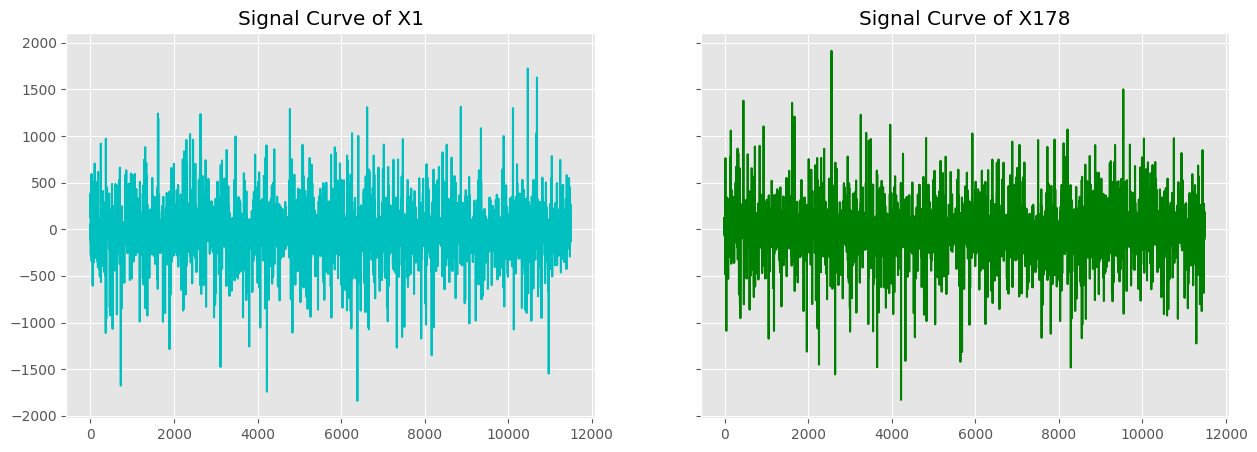

In [36]:
# get a measure of correlation firt two consecutive epochs 
# positive, very high correlation
print(pd.DataFrame(data = {"X1": df["X1"], "X2": df["X2"]}).corr())
print()

# get a measure of correlation between first and last epoch
# no correlation 
print(pd.DataFrame(data = {"X1": df["X1"], "X178": df["X178"]}).corr())

# plot first and last signal 
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (15, 5))
ax1.plot(df["X1"], color = "c")
ax1.set_title("Signal Curve of X1")
ax2.plot(df["X178"], color = "g")
ax2.set_title("Signal Curve of X178")
plt.show()

<Axes: >

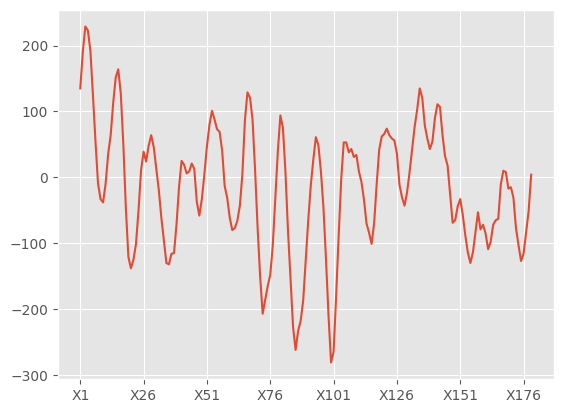

In [37]:
df.iloc[0].plot()

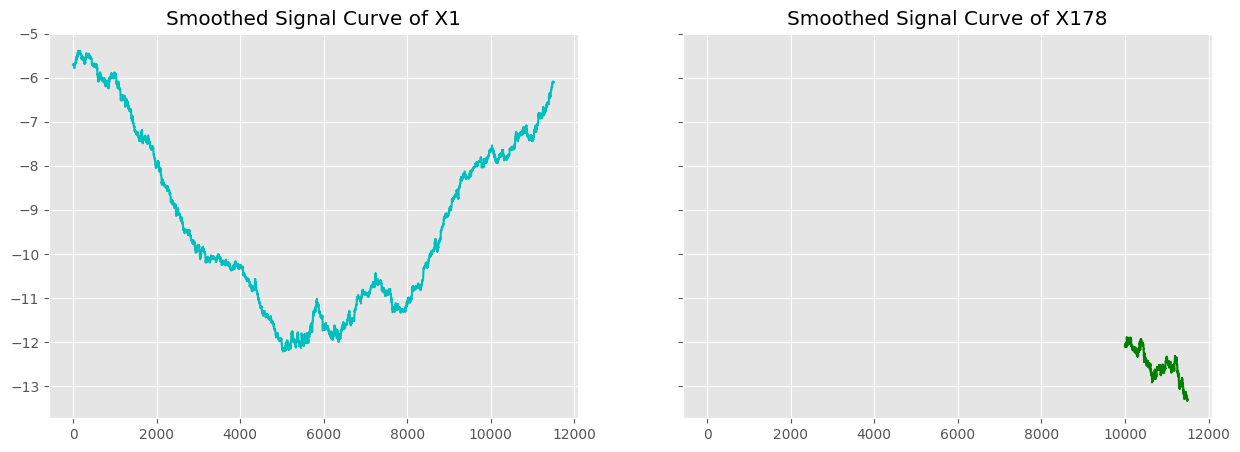

In [38]:
# calculate discrete linear convolution for moving average

# plot first epoch with convolution 
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (15, 5))
interval = 10000 
window = np.ones(interval) / interval
moving_avg = np.convolve(df["X1"], window, "same")
ax1.plot(moving_avg, c = "c")
ax1.set_title("Smoothed Signal Curve of X1")

# plot last epoch with alternative method 
ax2 = df["X178"].rolling(window = 10000).mean()
ax2.plot(c = "g")
plt.title("Smoothed Signal Curve of X178")
plt.show()

In [39]:
# define features, labels 
features = df.drop(["y"], axis = 1)
labels = df["y"]

In [40]:
# invert the time domain 
features = features.T

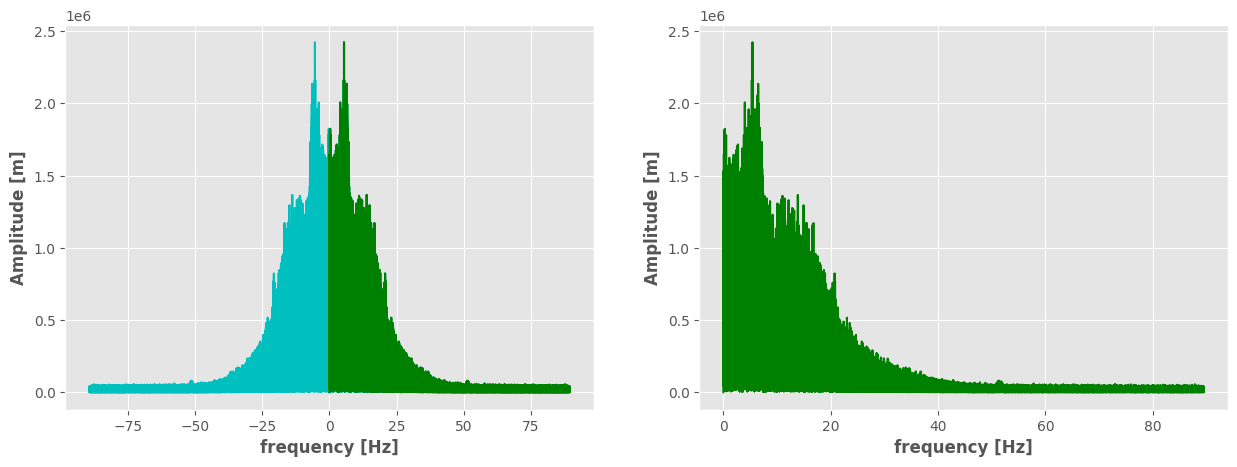

In [41]:
# switch from time domain to frequency domain with fft 

# define sampling rate 
"""
num_samples = 4094 
duration = 23
sampling_rate = num_samples / duration
"""
sampling_rate = df.shape[1]

# remove DC component
features = features - np.mean(features)

# fast fourier transformation 
# fourier_space = [features.iloc[:,i].ravel() for i in range(features.shape[1])]
# fourier_space = [k for j in fourier_space for k in j]
fourier_range = fft(features.T.values.ravel())
fourier_domain = fftfreq(features.T.values.ravel().size, 1/sampling_rate)

# use abs to deal with complex numbers 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
ax1.plot(fourier_domain, np.abs(fourier_range), c = "c")
ax1.plot(fourier_domain[:fourier_domain.size // 2], np.abs(fourier_range[:fourier_range.size // 2]), c = "g")
ax1.set_xlabel("frequency [Hz]", fontweight = "bold")
ax1.set_ylabel("Amplitude [m]", fontweight = "bold")
ax2.plot(fourier_domain[:fourier_domain.size // 2], np.abs(fourier_range[:fourier_range.size // 2]), c = "g")
ax2.set_xlabel("frequency [Hz]", fontweight = "bold")
ax2.set_ylabel("Amplitude [m]", fontweight = "bold")
plt.show()

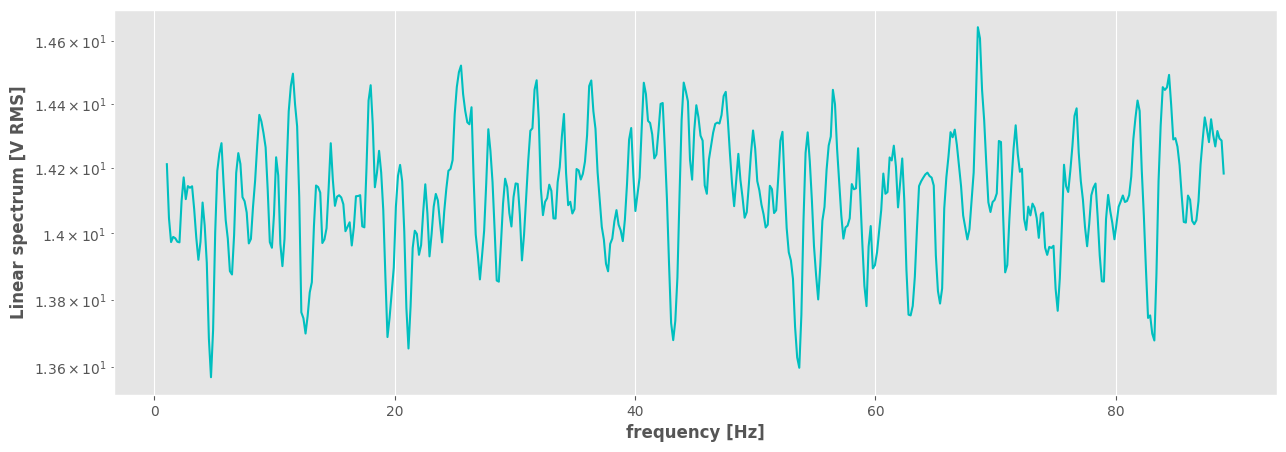

RMS estimate: 14.64


In [42]:
# Welch's Method 
# make a plot with log scaling on the y-axis 
freqs, power_spectrum = signal.welch(features.values.ravel(), sampling_rate, "flattop", 1024, scaling = "spectrum")

# filter frequency and power spectrum 
freqs, power_spectrum = freqs[(freqs > 1) & (freqs < 89)], power_spectrum[(freqs > 1) & (freqs < 89)]

plt.figure(figsize = (15, 5))
plt.semilogy(freqs, np.sqrt(power_spectrum), c = "c")
plt.xlabel("frequency [Hz]", fontweight = "bold")
plt.ylabel("Linear spectrum [V RMS]", fontweight = "bold")
plt.show()

# RMS estimate 
print(f"RMS estimate: {round(np.sqrt(power_spectrum.max()), 2)}")

### Significant Frequency Bands 

1. **Delta:** has a frequency of 3 Hz or below.
1. **Theta:** has a frequency of 3.5 to 7.5 Hz and is classified as "slow" activity.
1. **Alpha:** has a frequency between 7.5 and 13 Hz.
1. **Beta:**  has a frequency bigger than 13 Hz.

> [See source](https://www.medicine.mcgill.ca/physio/vlab/biomed_signals/eeg_n.htm)


In [43]:
# there is a spike in the beta waves, this could be important 
# majority of spikes in power spectrum is composed of beta waves 
welch_df = pd.DataFrame({"frequency": freqs, "power": power_spectrum})
welch_df.head()

,frequency,power
0,1.048828,202.003040
1,1.223633,197.313361
2,1.398438,195.267694
3,1.573242,195.707190
4,1.748047,195.590602


Delta size: 12
Theta size: 22
Alpha size: 32
Beta size: 435
# of significant frequencies: 501


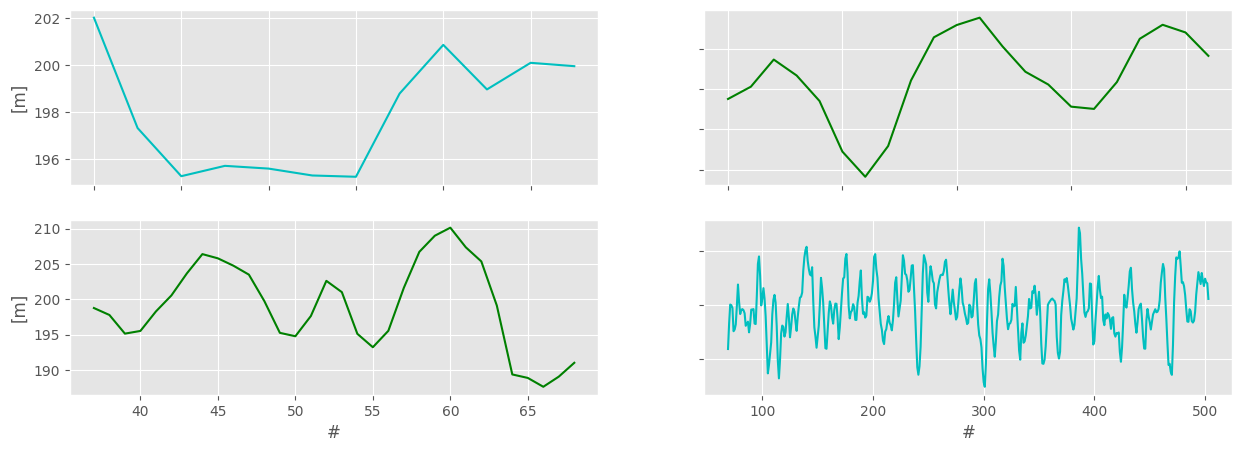

In [44]:
# extract individual wave amplitudes 
for wave in range(5):
    delta = welch_df[welch_df.frequency <= 3].power
    theta = welch_df[(welch_df.frequency >= 3.5) & (welch_df.frequency <= 7.5)].power
    alpha = welch_df[(welch_df.frequency >= 7.5) & (welch_df.frequency <= 13)].power
    beta = welch_df[welch_df.frequency >= 13].power


# of datapoints in each wave 
print(f"Delta size: {delta.size}")
print(f"Theta size: {theta.size}")
print(f"Alpha size: {alpha.size}")
print(f"Beta size: {beta.size}")
print(f"# of significant frequencies: {delta.size + theta.size + alpha.size + beta.size}")

# plot all waves
fig, axs = plt.subplots(2, 2, figsize = (15,5))
axs[0, 0].plot(delta, c = "c")
axs[0, 1].plot(theta, c = "g")
axs[1, 0].plot(alpha, c = "g")
axs[1, 1].plot(beta, c = "c")

for ax in axs.flat:
    ax.set(xlabel="#", ylabel="[m]")

for ax in axs.flat:
    ax.label_outer()

In [45]:
# --- add feature ---

waves = [delta, theta, alpha, beta]
features = features._append(pd.concat(waves))

In [46]:
# run cell after running the above cell only 

# recall individual wave counts 
print(f"Delta size: {delta.size}")
print(f"Theta size: {theta.size}")
print(f"Alpha size: {alpha.size}")
print(f"Beta size: {beta.size}")
print(f"# of significant frequencies: {delta.size + theta.size + alpha.size + beta.size}")

# extend each wave, construct amplitude feature vector
feat_vector = []
total = delta.size + theta.size + alpha.size + beta.size
factor = features.iloc[-1].size // total

for wave in waves:
    wave = wave.to_list() * factor
    feat_vector.append(wave)
    
# add remainder as a combination of scarce wave types 
feat_vector = [k for y in feat_vector for k in y]

avg = (delta.mean() + theta.mean() + alpha.mean() + beta.mean()) / 4 
remainder = features.iloc[-1].size - len(feat_vector)
print(f"# of beta waves for extension: {remainder}")

for k in range(remainder):
    feat_vector.append(avg)

# check computation
assert(len(feat_vector) == features.iloc[-1].size)

# --- add feature ---
features = features.iloc[:-1]
features = features._append(pd.DataFrame(feat_vector, columns = ["amplitudes"]).T)

Delta size: 12
Theta size: 22
Alpha size: 32
Beta size: 435
# of significant frequencies: 501
# of beta waves for extension: 478


In [47]:
# run cell after running the above cell only 

# add fourier domain, i.e frequencies to the feature space
for wave in range(5):
    delta = welch_df[welch_df.frequency <= 3].frequency
    theta = welch_df[(welch_df.frequency >= 3.5) & (welch_df.frequency <= 7.5)].frequency
    alpha = welch_df[(welch_df.frequency >= 7.5) & (welch_df.frequency <= 13)].frequency
    beta = welch_df[welch_df.frequency >= 13].frequency

# --- add feature ---
waves = [delta, theta, alpha, beta]
features = features._append(pd.DataFrame(pd.concat(waves), columns = ["frequency"]).T)

In [48]:
# run cell after running the above cell only 

# replace amplitude with frequency
# perform same arithmetic operations 
feat_vector = []
total = delta.size + theta.size + alpha.size + beta.size
factor = features.iloc[-1].size // total

for wave in waves:
    wave = wave.to_list() * factor
    feat_vector.append(wave)
    
# add remainder as a combination of scarce wave types 
feat_vector = [k for y in feat_vector for k in y]

avg = (delta.mean() + theta.mean() + alpha.mean() + beta.mean()) / 4
remainder = features.iloc[-1].size - len(feat_vector)
print(f"# of beta waves for extension: {remainder}")

for k in range(remainder):
    feat_vector.append(avg)

# check computation
assert(len(feat_vector) == features.iloc[-1].size)

# --- add feature --- 
features = features.iloc[:-1]
features = features._append(pd.DataFrame(feat_vector, columns = ["frequency"]).T)

# of beta waves for extension: 478


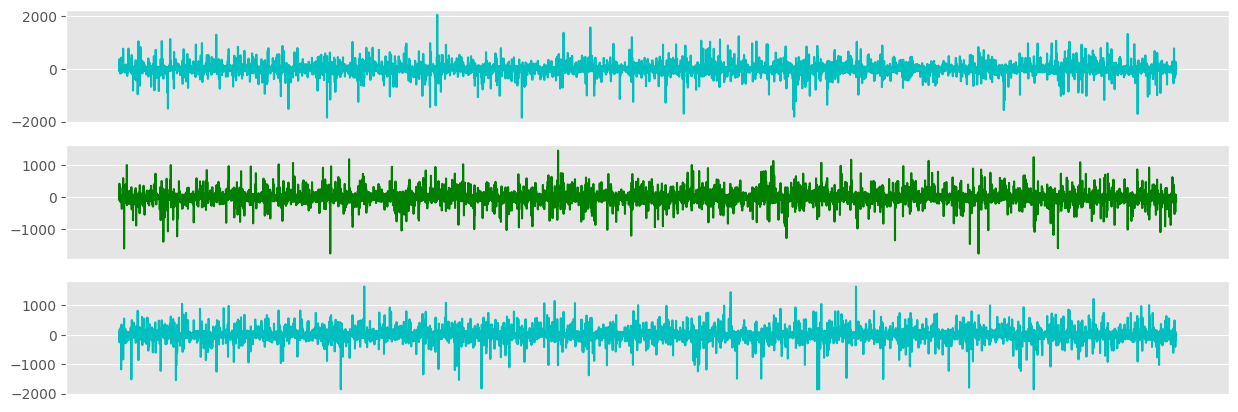

In [49]:
# sample eeg-values across features 
sample = np.random.randint(low = 0, high = 178, size = 3)
fig, ax = plt.subplots(3, figsize = (15, 5))
for x in range(3):
    if x % 2 == 0:
        color = "c"
    else:
        color = "g"
    ax[x].plot(features.iloc[sample[x]], c = color)
    ax[x].set_xticks([])

### Binary Classification

In [50]:
# make labels binary
binary = lambda label: 0 if label != 1 else label
labels = labels.apply(binary)

# features, labels as numpy arrays 
features = features.T.values 
labels = labels.values

In [51]:
# below is principal component analysis
# it is not necessary unless you have trouble with high dimensionality 

# regular train, test split here with stratification 
X_train, X_test, y_train, y_test =  train_test_split(features, labels, test_size = 0.4, 
                                                     random_state = 42, stratify = labels)
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])

print(f"Size of training sample: {X_train.shape}")
print(f"Size of test sample: {X_test.shape}")

Size of training sample: (6900, 180)
Size of test sample: (4600, 180)


### TODO: Multi-class Classification

In [52]:
# principal component analysis 

# scale 
features = preprocessing.StandardScaler().fit_transform(features)

pca = PCA(n_components = 50)
reduced = pca.fit_transform(features)
pca_data = pd.DataFrame(reduced, columns = ["component_" + str(idx) for idx in range(1,51)])

# display first five principal components 
print(pca_data[["component_" + str(idx) for idx in range(1,6)]])

# total information stored 
print(f"\nCumulative variance explained: {np.sum(pca.explained_variance_ratio_)}")

       component_1  component_2  component_3  component_4  component_5
0        -0.137800    -1.148809     0.844090    -0.069205    -0.167525
1        -1.704095    -3.649103     6.163910     8.034612     4.555274
2         0.495455    -0.266937     0.939621    -0.661884     1.594064
3        -0.174418     0.244847    -0.065332    -0.105982     1.622381
4        -0.239357     0.112059     0.495056    -0.528639     0.194553
...            ...          ...          ...          ...          ...
11495     0.028386    -0.268722     0.071122    -0.116100     0.451094
11496     0.619604    -4.027797    -3.814329    -4.273196    -2.429727
11497    -0.289212    -0.203772    -0.351499    -0.071084    -0.298742
11498    -0.175948    -1.158296     0.546158    -0.479889     1.410447
11499    -0.043623     0.310091     0.206587     0.191602    -0.527430

[11500 rows x 5 columns]

Cumulative variance explained: 0.9837286557611977


In [53]:
# linear support vector machine 
# train, test split 
X_train, X_test, y_train, y_test = train_test_split(pca_data.values, labels, 
                                                    test_size = 0.33,random_state = 42)

In [54]:
# ratio of labels in data 
print("Class distribution before over-sampling")
print(f"Ratio of label = 1: {np.sum(labels) / labels.size}")
print(f"Ratio of label = 0: {1 - np.sum(labels) / labels.size}")

# data is heavily unbalanced

Class distribution before over-sampling
Ratio of label = 1: 0.2
Ratio of label = 0: 0.8


### Oversampling
* Do not run for complexity reasons 

In [55]:
"""
# oversample training data
# apply to training set only 
X_train, y_train = RandomOverSampler(sampling_strategy = "minority").fit_resample(X_train, y_train)

# observe new ratio 
print("\nClass distribution after over-sampling")
print(f"Ratio of label = 1: {np.sum(y_train) / y_train.size}")
print(f"Ratio of label = 0: {1 - np.sum(y_train) / y_train.size}")
"""

'\n# oversample training data\n# apply to training set only \nX_train, y_train = RandomOverSampler(sampling_strategy = "minority").fit_resample(X_train, y_train)\n\n# observe new ratio \nprint("\nClass distribution after over-sampling")\nprint(f"Ratio of label = 1: {np.sum(y_train) / y_train.size}")\nprint(f"Ratio of label = 0: {1 - np.sum(y_train) / y_train.size}")\n'

In [56]:
# classification 
classifier = svm.SVC(kernel = "linear", C = 1, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [57]:
# accuracy 
print(f"Accuracy of linear SVM: {metrics.accuracy_score(y_test, y_pred)}\n")

# classification report 
print(metrics.classification_report(y_test, y_pred))

Accuracy of linear SVM: 0.8076416337285902

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3025
           1       1.00      0.05      0.10       770

    accuracy                           0.81      3795
   macro avg       0.90      0.53      0.50      3795
weighted avg       0.85      0.81      0.73      3795



In [58]:
# random forest classifier 
classifier = RandomForestClassifier(random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [59]:
# accuracy 
print(f"Accuracy of random forest classifier: {metrics.accuracy_score(y_test, y_pred)}\n")

# classification report 
print(metrics.classification_report(y_test, y_pred))

Accuracy of random forest classifier: 0.9752305665349144

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3025
           1       0.94      0.94      0.94       770

    accuracy                           0.98      3795
   macro avg       0.96      0.96      0.96      3795
weighted avg       0.98      0.98      0.98      3795



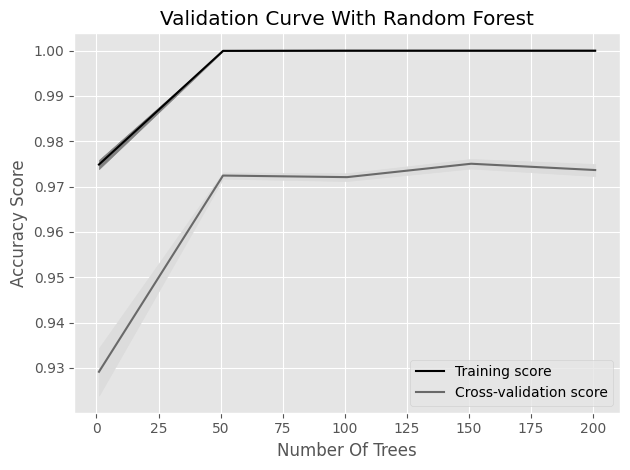

In [60]:
# Create range of values for parameter
param_range = np.arange(1, 250, 50)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             features, 
                                             labels, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [61]:
# k-fold cross validation 
accs = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10).mean()*100
print(f"10-fold accuracy: {round(accs, 2)}%")

10-fold accuracy: 97.27%


In [62]:
# no parameter optimization necessary 

### Can we predict seizures beforehand ? 

In [63]:
features = df.drop(["y"], axis = 1).T

In [64]:
# reindex 
idx = {}
for i in range(1,179):
    idx["X" + str(i)] = float(i)
features.rename(index = idx, inplace = True)
features.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11490,11491,11492,11493,11494,11495,11496,11497,11498,11499
1.0,135,386,-32,-105,-9,55,-55,1,-278,8,...,-22,102,-27,-136,-39,-22,-47,14,-40,29
2.0,190,382,-39,-101,-65,28,-9,-2,-246,15,...,-64,137,-53,-137,-16,-22,-11,6,-25,41
3.0,229,356,-47,-96,-98,18,52,-8,-215,13,...,-121,158,-84,-138,-13,-23,28,-13,-9,57
4.0,223,331,-37,-92,-102,16,111,-11,-191,3,...,-201,158,-104,-135,-14,-26,77,-16,-12,72
5.0,192,320,-32,-89,-78,16,135,-12,-177,-6,...,-292,128,-131,-130,-68,-36,141,10,-2,74


In [65]:
# average the data before further analysis
avg_df = pd.DataFrame(features.mean(axis = 1), columns = ["t"])
avg_df.head(5)

,t
1.0,-11.581391
2.0,-10.911565
3.0,-10.187130
4.0,-9.143043
5.0,-8.009739


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

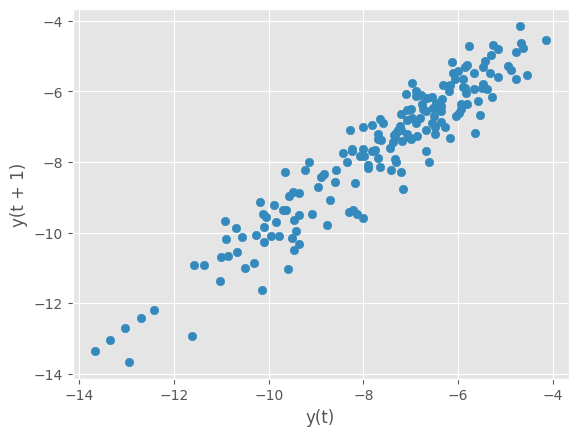

In [66]:
# plot for lag = 1
lag_plot(avg_df)

In [67]:
# check correlation between (t+1) and (t-1)
corr_df = pd.concat([avg_df.shift(1), avg_df], axis=1)
corr_df.columns = ["t-1", "t+1"]
corr_df.corr()

,t-1,t+1
t-1,1.000000,0.949695
t+1,0.949695,1.000000


In [68]:
# for further analysis 
corr_df.fillna(method = "bfill", inplace = True)
corr_df.head(1)

,t-1,t+1
1.0,-11.581391,-11.581391


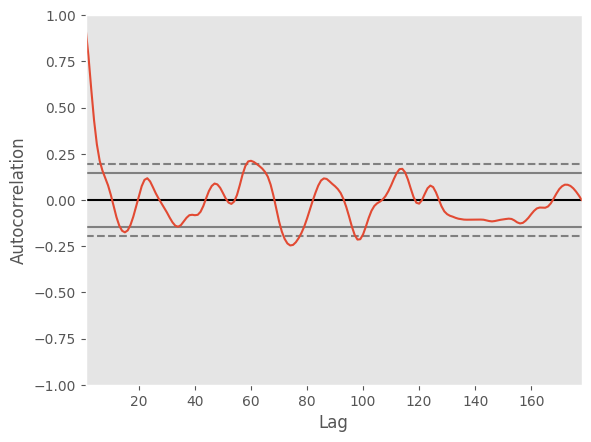

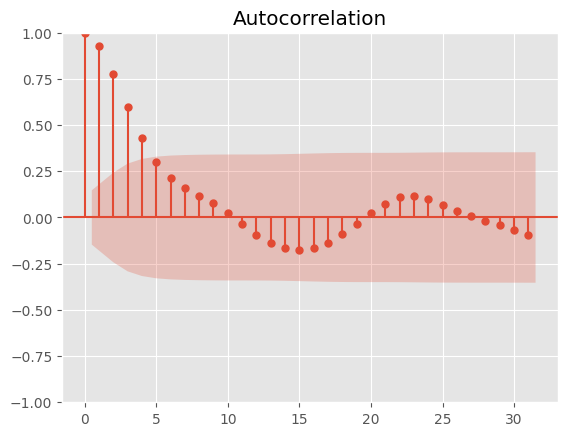

In [69]:
# autocorrelation 
autocorrelation_plot(avg_df)
plot_acf(avg_df, lags = 31)
plt.show()

Mean squared error for persistence model: 0.38


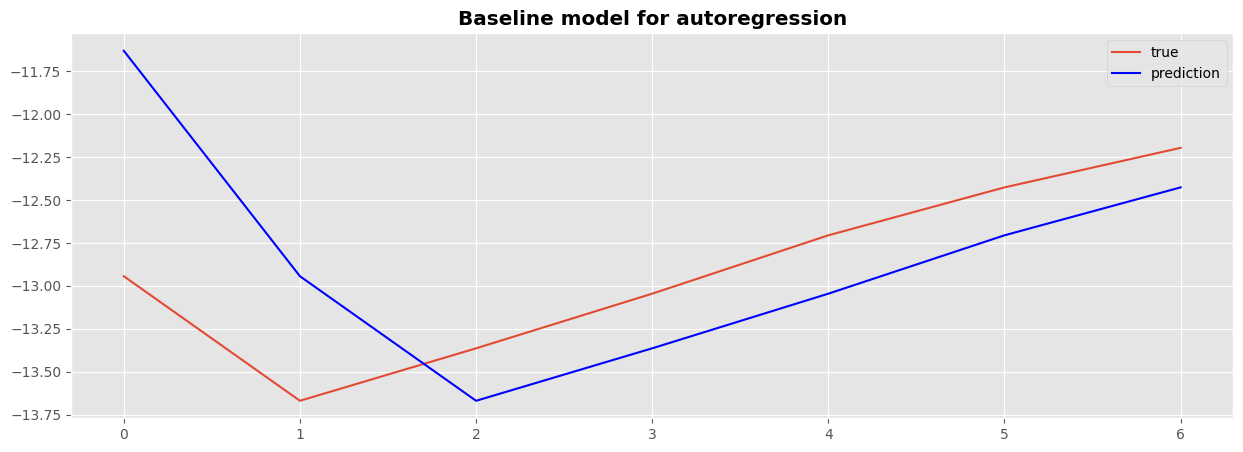

In [70]:
# baseline persistence model 

# create lagged data 
X = corr_df.values 

# perform the split 
train, test = X[:len(X)-7], X[len(X)-7:]
X_train, y_train = train[:,0], train[:,1]
X_test, y_test = test[:,0], test[:,1]


# every item in X_test is a forecast 
pred = [x for x in X_test]

# scoring
mse = metrics.mean_squared_error(y_test, pred)
print(f"Mean squared error for persistence model: {round(mse,2)}")

# plot persistence model
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(y_test)
ax.plot(pred, c = "b")
ax.legend(["true", "prediction"])
ax.set_title("Baseline model for autoregression", fontweight = "bold")
plt.show()

In [71]:
# make arrays one dimensional 
train = train.ravel()
test = test.ravel()

Coefficients are [-0.18772135  0.98137941  1.18696055 -1.16751555 -0.14626921  0.14319416
 -0.78413955  0.7743798   0.31652467 -0.31433218  0.32251789 -0.32041682
 -0.46640424  0.45823596 -0.00565637  0.0093522   0.29633458 -0.29112601
 -0.07895883  0.06819409 -0.1668695   0.16931159 -0.06184233  0.06680221
  0.07517807 -0.08788192 -0.06751026  0.0645312   0.11145304 -0.0913703
 -0.16889813  0.15018866]

predicted = -11.603869143647817	actual = -11.630347826086956
predicted = -13.002073966845593	actual = -12.943478260869565
predicted = -12.93978782747659	actual = -12.943478260869565
predicted = -13.647341276176004	actual = -13.668869565217392
predicted = -13.55030066692716	actual = -13.668869565217392
predicted = -13.119505759060305	actual = -13.363304347826087
predicted = -13.002194819698527	actual = -13.363304347826087
predicted = -11.827078436571206	actual = -13.045043478260869
predicted = -11.709370833357038	actual = -13.045043478260869
predicted = -10.32993047160975	actual = -12.7

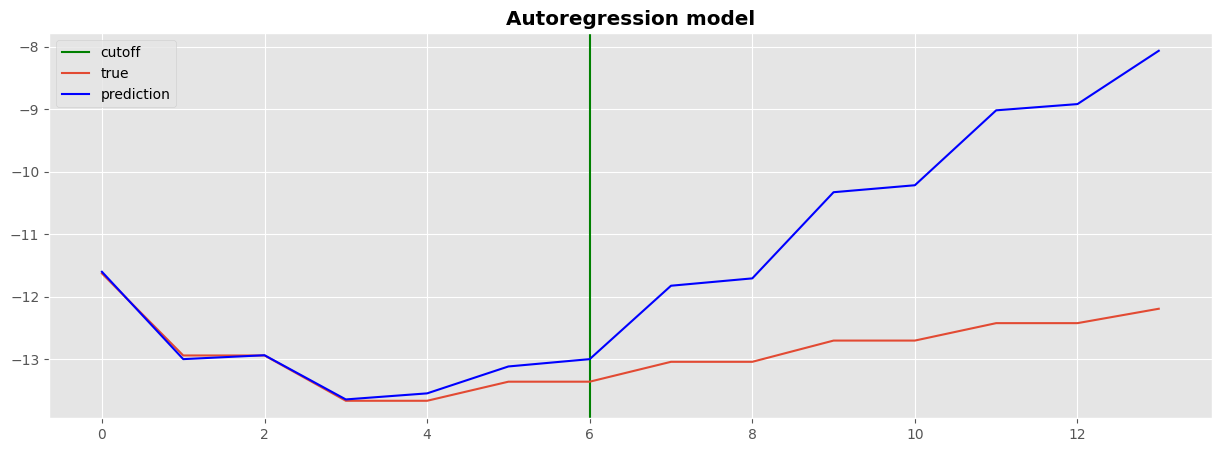

In [72]:
# autoregression model

model = AutoReg(train, lags = 31)
model_fit = model.fit()
print(f"Coefficients are {model_fit.params}")

# make predictions 
print()
pred = model_fit.predict(len(train), (len(train) + len(test) - 1), dynamic = False)
for p in range(len(pred)):
    print("predicted = {predicted}\tactual = {actual}".format(predicted = pred[p], actual = test[p]))
    
# root mean squared error 
rmse = np.sqrt(metrics.mean_squared_error(test, pred))
print(f"\nRoot mean squared error: {rmse}")

# plot true, pred values with cutoff
fig, ax = plt.subplots(figsize = (15,5))
plt.axvline(x = 6, c = "g")
ax.plot(test)
ax.plot(pred, c = "b")
ax.legend(["cutoff","true", "prediction"])
ax.set_title("Autoregression model", fontweight = "bold")
plt.show()

### Discrepancy starts at lag = 6

predicted = -11.603869143647817	actual = -11.630347826086956
predicted = -13.028059600679283	actual = -12.943478260869565
predicted = -12.913712359276442	actual = -12.943478260869565
predicted = -13.550497926963992	actual = -13.668869565217392
predicted = -13.640346867215314	actual = -13.668869565217392
predicted = -13.26947376669608	actual = -13.363304347826087
predicted = -13.327362385721754	actual = -13.363304347826087
predicted = -12.396243456794338	actual = -13.045043478260869
predicted = -12.994492527092328	actual = -13.045043478260869
predicted = -12.60523224114418	actual = -12.705130434782609
predicted = -12.646744993270985	actual = -12.705130434782609
predicted = -12.471796916311844	actual = -12.426
predicted = -12.364197249651783	actual = -12.426
predicted = -11.901490225360275	actual = -12.195652173913043

Root mean squared error: 0.20053430220769325


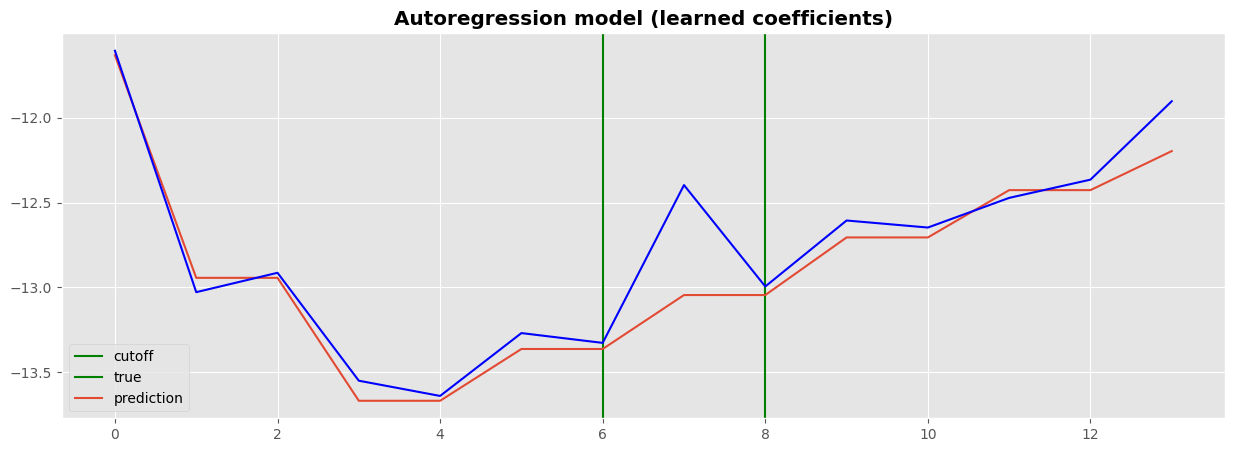

In [73]:
# learn the coefficients 
window = 31
model = AutoReg(train, lags = window)
model_fit = model.fit()
coef = model_fit.params

# get prior 31 observations 
# make predictions 
history = train[len(train) - window:]
history = [history[i] for i in range(len(history))]
yhat = coef[0]
pred = []
for p in range(len(test)):
    hist_len = len(history)
    lag = [history[i] for i in range(hist_len - window, hist_len)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[p]
    pred.append(yhat)
    history.append(obs)
    print("predicted = {predicted}\tactual = {actual}".format(predicted = yhat, actual = obs))

# root mean squared error 
rmse = np.sqrt(metrics.mean_squared_error(test, pred))
print(f"\nRoot mean squared error: {rmse}")

# plot true, pred values with cutoff
fig, ax = plt.subplots(figsize = (15,5))
plt.axvline(x = 6, c = "g")
plt.axvline(x = 8, c = "g")
ax.plot(test)
ax.plot(pred, c = "b")
ax.legend(["cutoff","true", "prediction"])
ax.set_title("Autoregression model (learned coefficients)", fontweight = "bold")
plt.show()